In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\New Dataset Ducat\heart_diseases.xls")

# 📊 Dataset Contents
The dataset includes a variety of clinical and demographic parameters such as:
- Age
- Gender
- Chest Pain Type (cp)
- Resting Blood Pressure (trestbps)
- Cholesterol Level (chol)
- Fasting Blood Sugar
- Resting ECG results
- Maximum Heart Rate Achieved (thalach)
- Exercise-Induced Angina (exang)
- ST Depression (oldpeak)
- Slope of Peak Exercise ST Segment
- Number of Major Vessels (ca)
- Thalassemia (thal)
- Target (Heart Disease Presence: 0/1)

**These features represent key indicators widely used by cardiologists.**

In [14]:
data.shape

(918, 12)

In [15]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [16]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [18]:
data.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
47,50,M,ATA,140,216,0,Normal,170,N,0.0,Up,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [20]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# 1. Find the total number of patients and how many of them have heart disease 

In [32]:
data[data['HeartDisease']==1].groupby('HeartDisease')['HeartDisease'].count()

HeartDisease
1    508
Name: HeartDisease, dtype: int64

In [6]:
np.sum(data['HeartDisease'].values == 1)

np.int64(508)

# 2. Calculate the average age of patients using NumPy and compare it with Pandas .mean() result. Are both same? 

In [41]:
a=data['Age'].mean()
b=np.mean(data['Age'])
print(a)
print(b)

53.510893246187365
53.510893246187365


# 3. Which gender (Male/Female) has higher average cholesterol levels? (Use groupby + mean) 

In [44]:
data.groupby('Sex')['Cholesterol'].mean()

Sex
F    241.196891
M    187.513103
Name: Cholesterol, dtype: float64

# 4. Use NumPy to extract all patients above 60 years of age and count how many of them have heart disease 

In [3]:
np.sum((data['Age'] >= 60) & (data['HeartDisease'] == 1))

np.int64(185)

In [4]:
data[data["Age"] >= 60].groupby('HeartDisease')['HeartDisease'].count()

HeartDisease
0     68
1    185
Name: HeartDisease, dtype: int64

# 5. Which chest pain type is most commonly observed? Also compute its percentage in the dataset 

In [4]:
data['ChestPainType'].value_counts(normalize=True).mul(100).round(2).head(1)

ChestPainType
ASY    54.03
Name: proportion, dtype: float64

# 6. Find the patient with the maximum resting blood pressure and display their complete record 

In [27]:
data[data['RestingBP'] == data['RestingBP'].max()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1


# 7. Using Pandas + NumPy, detect outliers in the cholesterol column (IQR method). How many outliers exist? 

In [16]:
Q1 = data['Cholesterol'].quantile(0.25)
Q2 = data['Cholesterol'].quantile(0.50)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5*IQR 
upper_limit = Q3 + 1.5*IQR 

In [17]:
import seaborn as sns

<Axes: ylabel='Cholesterol'>

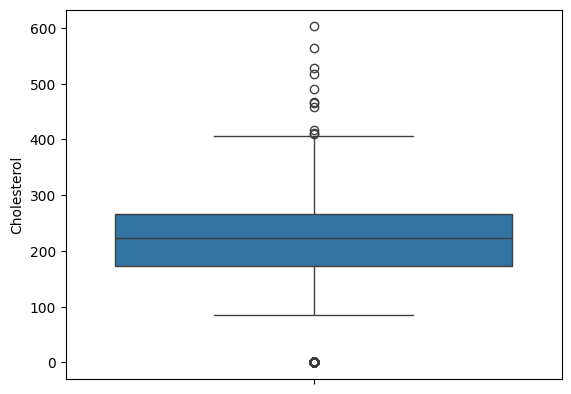

In [19]:
sns.boxplot(data['Cholesterol'])

In [28]:
d1=(data['Cholesterol']>upper_limit).sum()
d2=(data['Cholesterol']<lower_limit).sum()
outliers=d1+d2
outliers

np.int64(183)

np.int64(172)

In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# 8. Group patients by age category (e.g., <40, 40–55, 55+) and calculate the heart disease rate in each group 

In [3]:
data["Age_Group"]=data['Age'].apply(lambda x: "Group(20-30)" if x in range(20,31) else
                                "Group(31-40)" if x in range(31,41) else
                                "Group(41-50)" if x in range(41,51) else
                                "Group(51-60)" if x in range(51,61) else
                                "Group(61-70)" if x in range(61,71) else
                                "Group(71-80)" if x in range(71,81) else
                                "Other"
                               )

In [28]:
data['Age'].min()

np.int64(28)

In [29]:
data['Age'].max()

np.int64(77)

In [34]:
data[data['HeartDisease']==1].groupby('Age_Group')['HeartDisease'].count()

Age_Group
Group(31-40)     32
Group(41-50)     93
Group(51-60)    222
Group(61-70)    145
Group(71-80)     16
Name: HeartDisease, dtype: int64

# 9. Calculate correlation among features (cholesterol, blood pressure, max heart rate, age) and identify the strongest relationship 

# 10. Using NumPy conditional indexing, extract all male patients who have heart disease and cholesterol > 250 

In [10]:
data[(data['Sex'] == 'M') & (data['HeartDisease'] == 1) & (data['Cholesterol'] > 250)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Group
19,36,M,ATA,120,267,0,Normal,160,N,3.0,Flat,1,Group(31-40)
23,44,M,ATA,150,288,0,Normal,150,Y,3.0,Flat,1,Group(41-50)
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1,Group(51-60)
36,65,M,ASY,140,306,1,Normal,87,Y,1.5,Flat,1,Group(61-70)
49,41,M,ASY,110,289,0,Normal,170,N,0.0,Flat,1,Group(41-50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,58,M,ATA,120,284,0,LVH,160,N,1.8,Flat,1,Group(51-60)
884,67,M,ASY,160,286,0,LVH,108,Y,1.5,Flat,1,Group(61-70)
895,57,M,ASY,110,335,0,Normal,143,Y,3.0,Flat,1,Group(51-60)
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1,Group(51-60)


# 11. Find the top 3 most influential risk factors using .corr() sorted highest to lowest 

In [32]:
data.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


# 12. Group by chest pain type and compute the average max_heart_rate for each type 

In [12]:
data.groupby('ChestPainType')['MaxHR'].mean().round(2)

ChestPainType
ASY    128.48
ATA    150.21
NAP    143.24
TA     147.89
Name: MaxHR, dtype: float64

# 13. Using NumPy where(), create a new column "cholesterol_status": a. HIGH if cholesterol > 240 else NORMAL 

In [4]:
data["cholesterol_status"]=data['Cholesterol'].apply(lambda x: "High" if x >= 240 else
                                "Normal" if x < 240 else
                                "Other"
                               )

In [31]:
(data['cholesterol_status'] == 'High').sum()

np.int64(363)

In [32]:
(data['cholesterol_status'] == 'Normal').sum()

np.int64(555)

# 14. Among patients with HIGH cholesterol, what percentage have heart disease? 

In [52]:
percent = (data[(data['cholesterol_status']=='High') & (data['HeartDisease']==1)].shape[0] 
           / data[data['cholesterol_status']=='High'].shape[0]) * 100

print(round(percent, 2), "%")

52.62 %


In [43]:
data["HD_In_Yes_or_No"]=data['HeartDisease'].apply(lambda x: "Yes" if x == 1 else
                                "No")

In [55]:
data[(data['cholesterol_status']=='High') & (data['HD_In_Yes_or_No']=='Yes')].groupby('HD_In_Yes_or_No').count()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Group,cholesterol_status
HD_In_Yes_or_No,,,,,,,,,,,,,,
Yes,191,191,191,191,191,191,191,191,191,191,191,191,191,191


# 15. Group by gender and calculate mean blood pressure, cholesterol, and max heart rate (all in one result) 

In [56]:
data.groupby('Sex')[['RestingBP', 'Cholesterol', 'MaxHR']].mean().round(2)

,RestingBP,Cholesterol,MaxHR
Sex,,,
F,132.21,241.20,146.14
M,132.45,187.51,134.33


# 16. Find the age range (min–max) of patients using NumPy and match with Pandas 

In [60]:
(data['Age'].max())-(data['Age'].min())

np.int64(49)

# 17. Check whether the dataset has missing values. If yes, replace numerical NaN with column median using NumPy 

In [61]:
data.isnull().sum()

Age                   0
Sex                   0
ChestPainType         0
RestingBP             0
Cholesterol           0
FastingBS             0
RestingECG            0
MaxHR                 0
ExerciseAngina        0
Oldpeak               0
ST_Slope              0
HeartDisease          0
Age_Group             0
cholesterol_status    0
HD_In_Yes_or_No       0
dtype: int64

# 18. Using value_counts(), identify the combination of (gender + chest pain type) that occurs most frequently 

In [67]:
data[['Sex', 'ChestPainType']].value_counts().head(1)

Sex  ChestPainType
M    ASY              426
Name: count, dtype: int64

# 19. Segment patients into BMI-based risk (use NumPy cut if BMI column exists) and compute avg heart disease rate per segment 

# 20. Create a NumPy array of cholesterol values and find percentile values (25th, 50th, 75th). Interpret the results

In [26]:
data['Cholesterol'].values


array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 211, 273, 196, 201, 248, 267, 223, 184, 201, 288, 215, 209,
       260, 284, 468, 188, 518, 167, 224, 172, 186, 254, 306, 250, 177,
       227, 230, 294, 264, 259, 175, 318, 223, 216, 340, 289, 233, 205,
       224, 245, 180, 194, 270, 213, 365, 342, 253, 254, 224, 277, 202,
       260, 297, 225, 246, 412, 265, 215, 182, 218, 268, 163, 529, 167,
       100, 206, 277, 238, 223, 196, 213, 139, 263, 216, 291, 229, 208,
       307, 210, 329, 182, 263, 207, 147,  85, 269, 275, 179, 392, 466,
       186, 260, 254, 214, 129, 241, 188, 255, 276, 297, 207, 246, 282,
       338, 160, 156, 248, 272, 240, 393, 230, 246, 161, 163, 230, 228,
       292, 202, 388, 230, 294, 265, 215, 241, 166, 247, 331, 341, 291,
       243, 279, 273, 198, 249, 168, 603, 215, 159, 275, 270, 291, 342,
       190, 185, 290, 195, 264, 212, 263, 196, 225, 272, 231, 238, 222,
       179, 243, 235, 320, 187, 266, 288, 216, 287, 194, 238, 22

In [21]:
q1=data['Cholesterol'].quantile(0.25)
q2=data['Cholesterol'].quantile(0.50)
q3=data['Cholesterol'].quantile(0.75)
print(q1)
print(q2)
print(q3)

173.25
223.0
267.0


In [24]:
data['Cholesterol'][data['Cholesterol']<=q1].values

array([164, 167, 172, 163, 167, 100, 139, 147,  85, 129, 160, 156, 161,
       163, 166, 168, 159, 147, 132, 117, 173, 171, 160, 126, 160, 169,
       166,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 166,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 100,   0,
       171,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [15]:
percentile_25 = data['Cholesterol'][data['Cholesterol']<=q1].values
percentile_50 = data['Cholesterol'][data['Cholesterol']<=q2].values
percentile_75 = data['Cholesterol'][data['Cholesterol']<=q3].values

In [16]:
percentile_25

array([164, 167, 172, 163, 167, 100, 139, 147,  85, 129, 160, 156, 161,
       163, 166, 168, 159, 147, 132, 117, 173, 171, 160, 126, 160, 169,
       166,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 166,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 100,   0,
       171,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [27]:
percentile_50

array([180, 214, 195, 208, 207, 211, 164, 204, 211, 196, 201, 223, 184,
       201, 215, 209, 188, 167, 172, 186, 177, 175, 223, 216, 205, 180,
       194, 213, 202, 215, 182, 218, 163, 167, 100, 206, 223, 196, 213,
       139, 216, 208, 210, 182, 207, 147,  85, 179, 186, 214, 129, 188,
       207, 160, 156, 161, 163, 202, 215, 166, 198, 168, 215, 159, 190,
       185, 195, 212, 196, 222, 179, 187, 216, 194, 211, 209, 192, 184,
       193, 147, 219, 184, 215, 132, 216, 219, 217, 196, 222, 195, 195,
       117, 173, 200, 193, 198, 171, 219, 160, 200, 221, 126, 193, 220,
       198, 201, 220, 213, 160, 223, 222, 220, 190, 169, 181, 166, 211,
       182,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [18]:
percentile_75

array([180, 214, 195, 237, 208, 207, 211, 164, 204, 234, 211, 196, 201,
       248, 267, 223, 184, 201, 215, 209, 260, 188, 167, 224, 172, 186,
       254, 250, 177, 227, 230, 264, 259, 175, 223, 216, 233, 205, 224,
       245, 180, 194, 213, 253, 254, 224, 202, 260, 225, 246, 265, 215,
       182, 218, 163, 167, 100, 206, 238, 223, 196, 213, 139, 263, 216,
       229, 208, 210, 182, 263, 207, 147,  85, 179, 186, 260, 254, 214,
       129, 241, 188, 255, 207, 246, 160, 156, 248, 240, 230, 246, 161,
       163, 230, 228, 202, 230, 265, 215, 241, 166, 247, 243, 198, 249,
       168, 215, 159, 190, 185, 195, 264, 212, 263, 196, 225, 231, 238,
       222, 179, 243, 235, 187, 266, 216, 194, 238, 225, 224, 238, 211,
       251, 237, 209, 245, 192, 184, 193, 246, 249, 230, 147, 219, 184,
       215, 257, 132, 216, 263, 219, 226, 237, 217, 196, 263, 222, 195,
       256, 264, 195, 117, 173, 250, 200, 193, 198, 266, 171, 237, 219,
       260, 248, 160, 200, 221, 231, 126, 193, 220, 242, 235, 22